**PROBLEM DEFINITION**

***a) Specifying the Question***

reducing your dataset to a low dimensional dataset using the PCA

***b) Defining the metrics for success***

This section of the project entails reducing your dataset to a low dimensional dataset using the PCA. You will be required to perform your analysis and provide insights gained from your analysis.


***c) Understanding the context***

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.


***d) Recording the Experimental Design***

1.   Define the question, the metric for success, the context, experimental design taken.
2. Read and explore the given dataset.
3. reducing your dataset to a low dimensional dataset using the PCA

***e) Relevance of the data***

The data used for this project will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax)

[http://bit.ly/CarreFourDataset]


**Loading and checking data**

In [ ]:
sales <-read.csv("super.csv", header=TRUE,sep =",")

head(sales)


,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
#Checking for size of dataset
dim(sales)

[1] 1000   16

In [ ]:
#Checking for descriptive statistics and Null variables
#And datatypes
summary(sales)

  Invoice.ID           Branch          Customer.type         Gender         
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 Product.line         Unit.price       Quantity          Tax         
 Length:1000        Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Class :character   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Mode  :character   Median :55.23   Median : 5.00   Median :12.0880  
                    Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
                    3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
                    Max.   :99.96   Max. 

 From the summary, we can deduce the following from the data: 
 1. We have 1000 records and 16 attributes 
 2. Out of the 16 attributes, 8 are
of data type character 
 3. We don’t have any null values 
 4. Looking at the ranges around the summary statistics of our numeric variables, we see that they are measured in different units hence we will need to scale later

In [ ]:
head(sales)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


**Tidying the data**

In [ ]:
#Checking to see how many unique values are in each variable
rapply(sales,function(x)length(unique(x)))

Invoice.ID                  Branch           Customer.type 
                   1000                       3                       2 
                 Gender            Product.line              Unit.price 
                      2                       6                     943 
               Quantity                     Tax                    Date 
                     10                     990                      89 
                   Time                 Payment                    cogs 
                    506                       3                     990 
gross.margin.percentage            gross.income                  Rating 
                      1                     990                      61 
                  Total 
                    990

In [ ]:
ulst <- lapply(sales, unique)
ulst

$Invoice.ID
   [1] "750-67-8428" "226-31-3081" "631-41-3108" "123-19-1176" "373-73-7910"
   [6] "699-14-3026" "355-53-5943" "315-22-5665" "665-32-9167" "692-92-5582"
  [11] "351-62-0822" "529-56-3974" "365-64-0515" "252-56-2699" "829-34-3910"
  [16] "299-46-1805" "656-95-9349" "765-26-6951" "329-62-1586" "319-50-3348"
  [21] "300-71-4605" "371-85-5789" "273-16-6619" "636-48-8204" "549-59-1358"
  [26] "227-03-5010" "649-29-6775" "189-17-4241" "145-94-9061" "848-62-7243"
  [31] "871-79-8483" "149-71-6266" "640-49-2076" "595-11-5460" "183-56-6882"
  [36] "232-16-2483" "129-29-8530" "272-65-1806" "333-73-7901" "777-82-7220"
  [41] "280-35-5823" "554-53-8700" "354-25-5821" "228-96-1411" "617-15-4209"
  [46] "132-32-9879" "370-41-7321" "727-46-3608" "669-54-1719" "574-22-5561"
  [51] "326-78-5178" "162-48-8011" "616-24-2851" "778-71-5554" "242-55-6721"
  [56] "399-46-5918" "106-35-6779" "635-40-6220" "817-48-8732" "120-06-4233"
  [61] "285-68-5083" "803-83-5989" "347-34-2234" "199-75-8169" "853-23-2453"
  [66] "877-22-3308" "838-78-4295" "109-28-2512" "232-11-3025" "382-03-4532"
  [71] "393-65-2792" "796-12-2025" "510-95-6347" "841-35-6630" "287-21-9091"
  [76] "732-94-0499" "263-10-3913" "381-20-0914" "829-49-1914" "756-01-7507"
  [81] "870-72-4431" "847-38-7188" "480-63-2856" "787-56-0757" "360-39-5055"
  [86] "730-50-9884" "362-58-8315" "633-44-8566" "504-35-8843" "318-68-5053"
  [91] "565-80-5980" "225-32-0908" "873-51-0671" "152-08-9985" "512-91-0811"
  [96] "594-34-4444" "766-85-7061" "871-39-9221" "865-92-6136" "733-01-9107"
 [101] "163-56-7055" "189-98-2939" "551-21-3069" "212-62-1842" "716-39-1409"
 [106] "704-48-3927" "628-34-3388" "630-74-5166" "588-01-7461" "861-77-0145"
 [111] "479-26-8945" "210-67-5886" "227-78-1148" "645-44-1170" "237-01-6122"
 [116] "225-98-1496" "291-32-1427" "659-65-8956" "642-32-2990" "378-24-2715"
 [121] "638-60-7125" "659-36-1684" "219-22-9386" "336-78-2147" "268-27-6179"
 [126] "668-90-8900" "870-54-3162" "189-08-9157" "663-86-9076" "549-84-7482"
 [131] "191-10-6171" "802-70-5316" "695-51-0018" "590-83-4591" "483-71-1164"
 [136] "597-78-7908" "700-81-1757" "354-39-5160" "241-72-9525" "575-30-8091"
 [141] "731-81-9469" "280-17-4359" "338-65-2210" "488-25-4221" "239-10-7476"
 [146] "458-41-1477" "685-64-1609" "568-90-5112" "262-47-2794" "238-49-0436"
 [151] "608-96-3517" "584-86-7256" "746-94-0204" "214-17-6927" "400-89-4171"
 [156] "782-95-9291" "279-74-2924" "307-85-2293" "743-04-1105" "423-57-2993"
 [161] "894-41-5205" "275-28-0149" "101-17-6199" "423-80-0988" "548-46-9322"
 [166] "505-02-0892" "234-65-2137" "687-47-8271" "796-32-9050" "105-31-1824"
 [171] "249-42-3782" "316-55-4634" "733-33-4967" "608-27-6295" "414-12-7047"
 [176] "827-26-2100" "175-54-2529" "139-52-2867" "407-63-8975" "342-65-4817"
 [181] "130-98-8941" "434-83-9547" "851-28-6367" "824-88-3614" "586-25-0848"
 [186] "895-66-0685" "305-14-0245" "732-04-5373" "400-60-7251" "593-65-1552"
 [191] "284-34-9626" "437-58-8131" "286-43-6208" "641-43-2399" "831-07-6050"
 [196] "556-86-3144" "848-24-9445" "856-22-8149" "699-01-4164" "420-11-4919"
 [201] "606-80-4905" "542-41-0513" "426-39-2418" "875-46-5808" "394-43-4238"
 [206] "749-24-1565" "672-51-8681" "263-87-5680" "573-58-9734" "817-69-8206"
 [211] "888-02-0338" "677-11-0152" "142-63-6033" "656-16-1063" "891-58-8335"
 [216] "802-43-8934" "560-30-5617" "319-74-2561" "549-03-9315" "790-29-1172"
 [221] "239-36-3640" "468-01-2051" "389-25-3394" "279-62-1445" "213-72-6612"
 [226] "746-68-6593" "836-82-5858" "583-72-1480" "466-61-5506" "721-86-6247"
 [231] "289-65-5721" "545-46-3100" "418-02-5978" "269-04-5750" "157-13-5295"
 [236] "645-78-8093" "211-30-9270" "755-12-3214" "346-84-3103" "478-06-7835"
 [241] "540-11-4336" "448-81-5016" "142-72-4741" "217-58-1179" "376-02-8238"
 [246] "530-90-9855" "866-05-7563" "604-70-6476" "799-71-1548" "785-13-7708"
 [251] "845-51-0542" "662-47-5456" "883-17-4236" "290-68-2984" "704-11-6354"
 [256] "110-48-7033" "366-93-0948" "729-09-9681" "151-16-1484

We don’t have any abnormal entries. So we go ahead to drop the column for InvoiceID since it is only a unique ID for every transaction and will not be necessary for this analysis and the gross margin percentage since it is constant at 4.76 for all transactions.


In [ ]:
#Dropping columns
sales <- subset(sales, select = -c(Invoice.ID,gross.margin.percentage))

In [ ]:
head(sales)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,29.8865,4.1,627.6165


**Exploratory Data Analysis**

In [ ]:
nums <- subset(sales, select = -c(Branch, Customer.type,Gender,Product.line,Date, Time, Payment))
head(nums)

,Unit.price,Quantity,Tax,cogs,gross.income,Rating,Total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,29.8865,4.1,627.6165


In [ ]:
install.packages("tidyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyr)

In [ ]:
install.packages("magrittr")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:

library(ggplot2)
library(magrittr)
library(dplyr)
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
# Central tendecy values for numerical variables
describe(nums)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Unit.price,1,1000,55.67213,26.494628,55.230,55.617800,33.36591,10.0800,99.96,89.8800,0.007056230,-1.22206222,0.83783371
Quantity,2,1000,5.51000,2.923431,5.000,5.512500,2.96520,1.0000,10.00,9.0000,0.012902251,-1.21903927,0.09244699
Tax,3,1000,15.37937,11.708825,12.088,13.995553,11.13247,0.5085,49.65,49.1415,0.889893881,-0.09329206,0.37026557
cogs,4,1000,307.58738,234.176510,241.760,279.911063,222.64945,10.1700,993.00,982.8300,0.889893881,-0.09329206,7.40531145
gross.income,5,1000,15.37937,11.708825,12.088,13.995553,11.13247,0.5085,49.65,49.1415,0.889893881,-0.09329206,0.37026557
Rating,6,1000,6.97270,1.718580,7.000,6.973125,2.22390,4.0000,10.00,6.0000,0.008982638,-1.15552546,0.05434628
Total,7,1000,322.96675,245.885335,253.848,293.906616,233.78193,10.6785,1042.65,1031.9715,0.889893881,-0.09329206,7.77557702


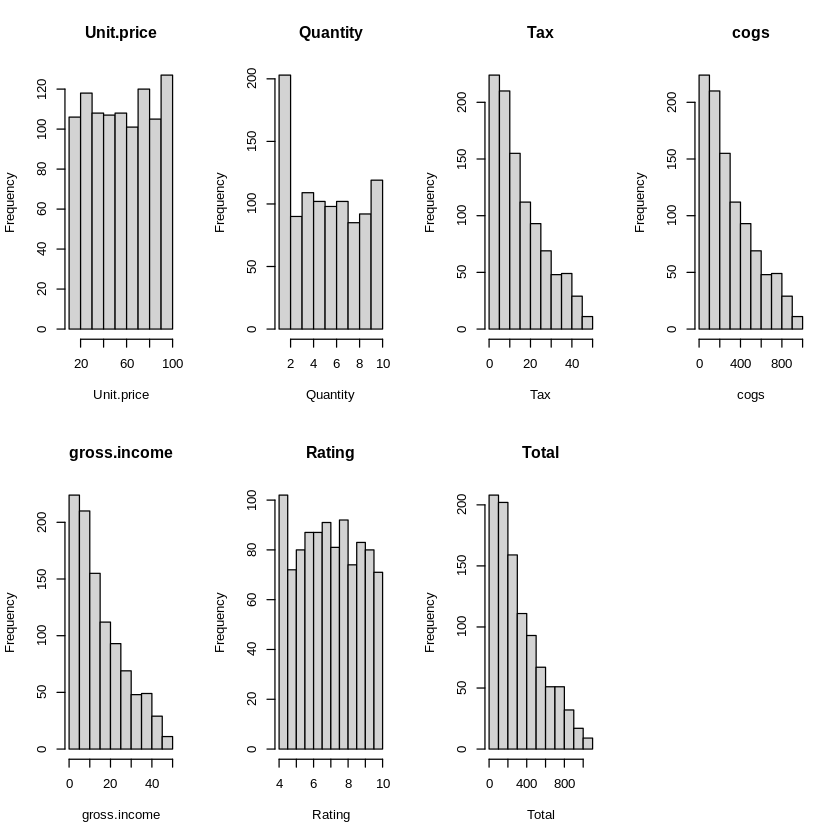

In [ ]:
#Distributions of different variables
par( mfrow= c ( 2 , 4 ))
for(i in 1 : length(nums)) {
hist(nums[,i], main= names(nums[i]), xlab = names(nums[i]))
}

Our numerical variables don’t follow a normal distribution. * Amount purchased per unit price seems to vary at all prices though a unit price of 90 to 100 has the highest
number of customer entries * Amount purchased seems to decrease with increase in Total and gross income, tax and cogs, with highest
frequency levels being where variable values are least.


**Checking how different factors affect our target variable “Total"**

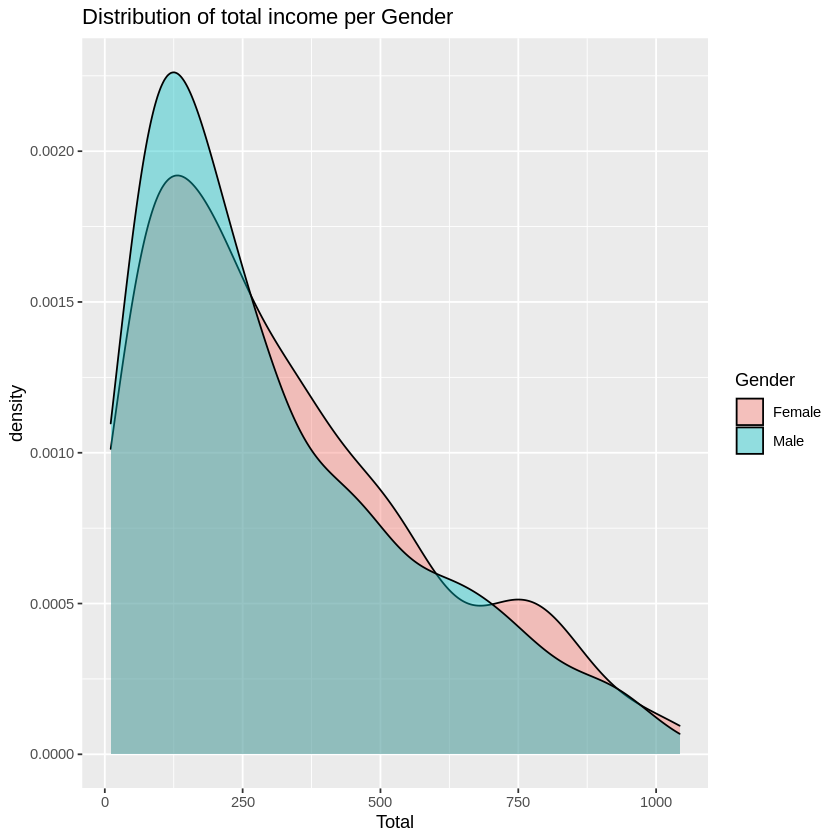

In [ ]:
#Distribution of income per Gender
ggplot(sales,
aes(x = Total,
fill = Gender)) +
geom_density(alpha = 0.4) +
labs(title = "Distribution of total income per Gender")

For Totals between 0 and 280 there seem to be more male than female though the frequency of females for totals exceeding 280 seems to surpass male

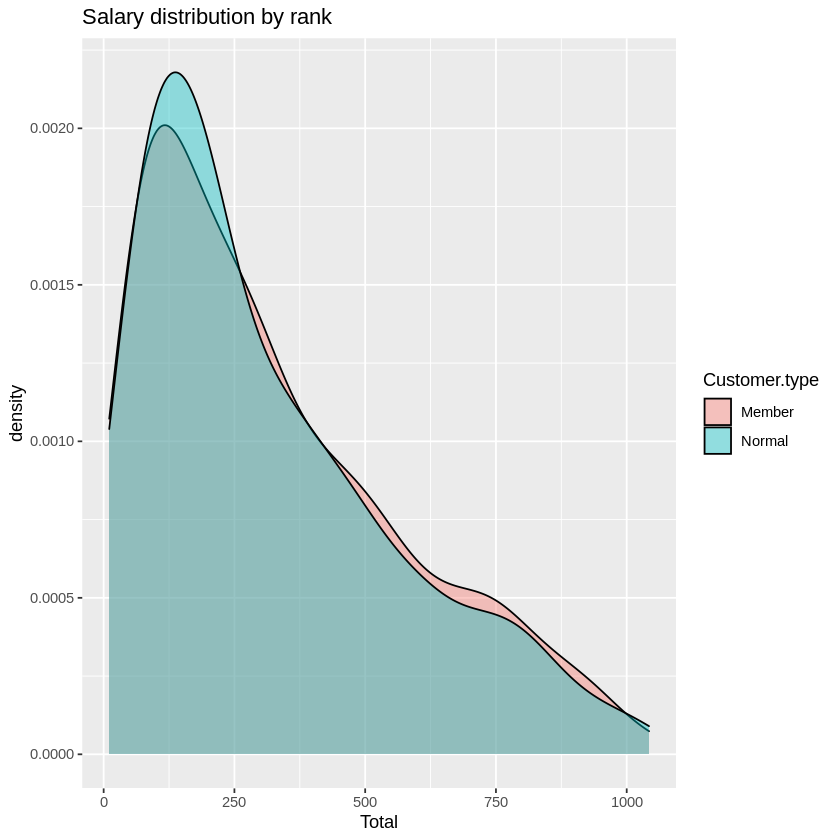

In [ ]:
#Salary distribution by rank
ggplot(sales,
aes(x = Total,
fill = Customer.type)) +
geom_density(alpha = 0.4) +
labs(title = "Salary distribution by rank")

Normal customers seem to have a greater influence on total than members.

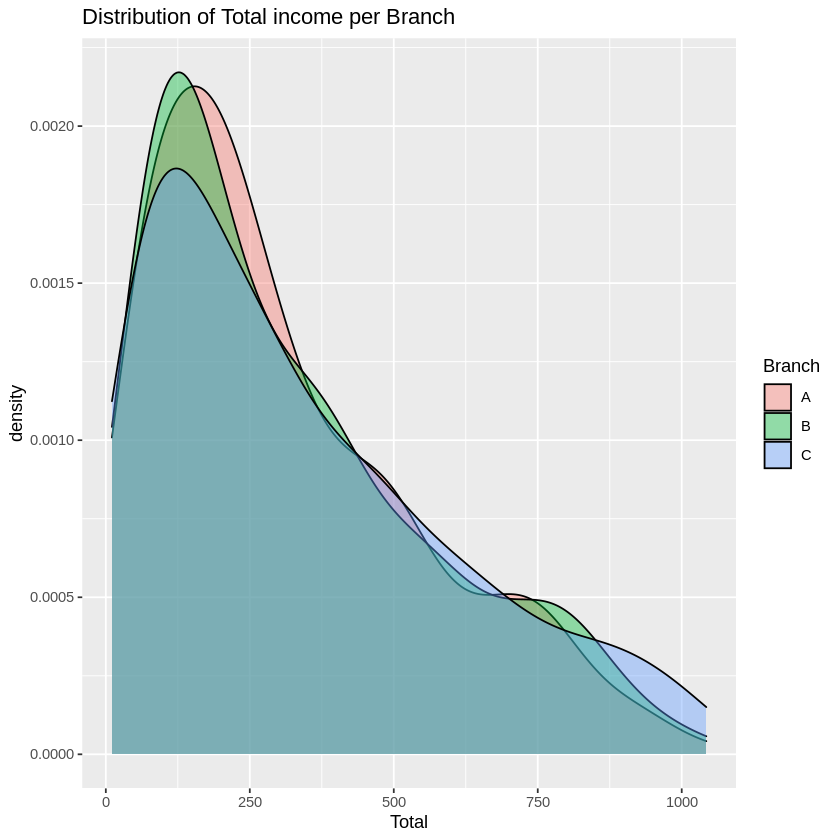

In [ ]:
#Distribution of Total income per Branch
ggplot(sales,
aes(x = Total,
fill = Branch)) +
geom_density(alpha = 0.4) +
labs(title = "Distribution of Total income per Branch")

Branch A contributes more to total and Branch C contributes the least

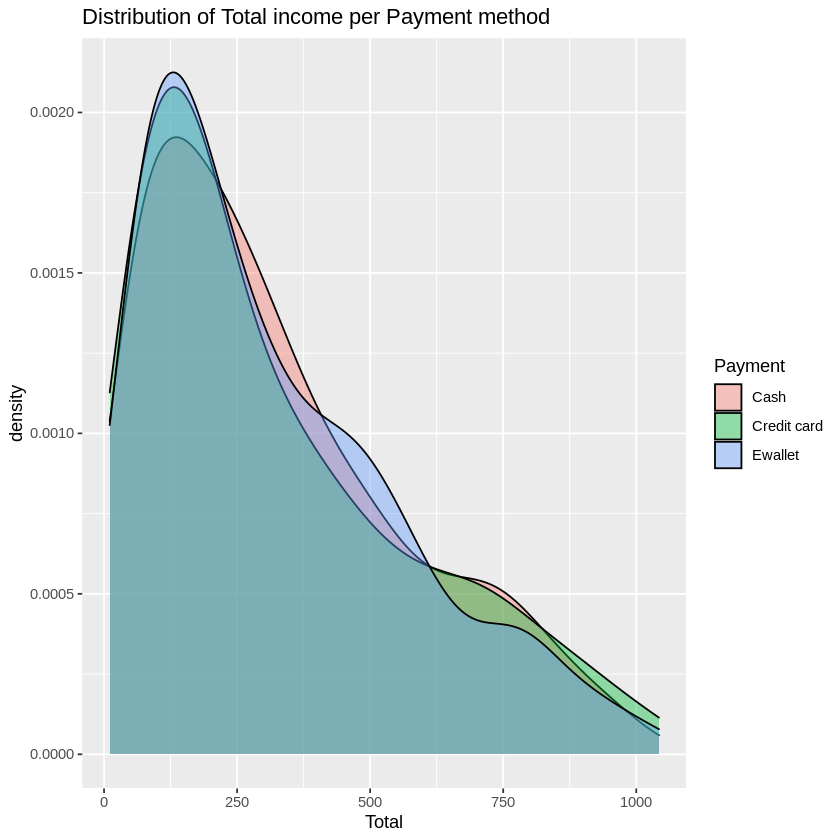

In [ ]:
#Distribution of Total per Payment method
ggplot(sales,
aes(x = Total,
fill = Payment)) +
geom_density(alpha = 0.4) +
labs(title = "Distribution of Total income per Payment method")

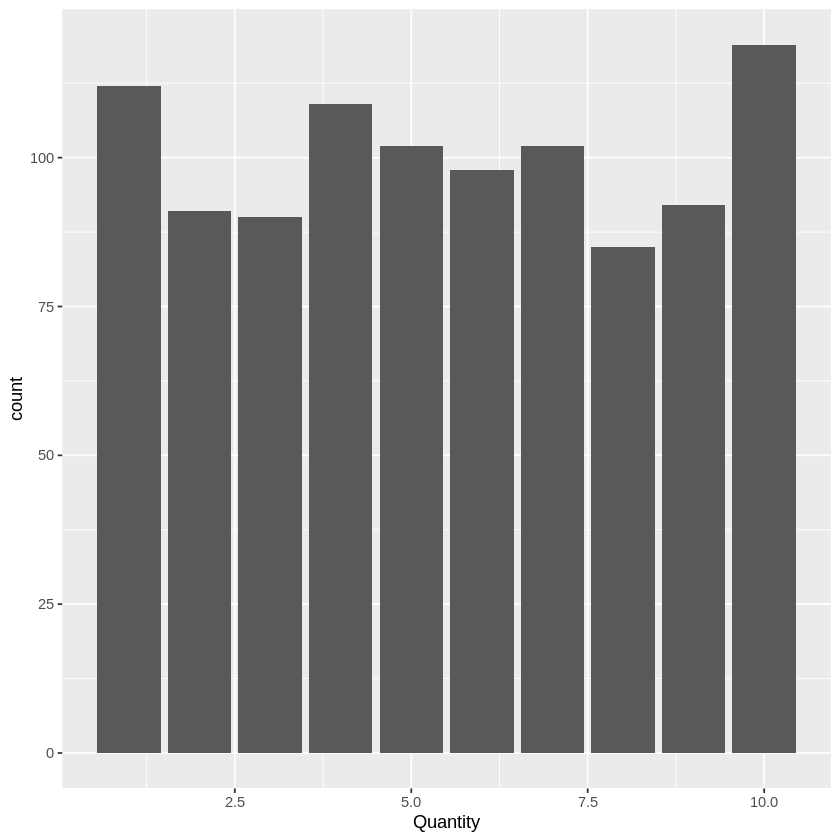

In [ ]:
#What quantity was mostly purchased in the store
ggplot(sales, aes(x = Quantity)) +
geom_bar()

Most people purchased 10items, followed by those who purchased 1 item

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



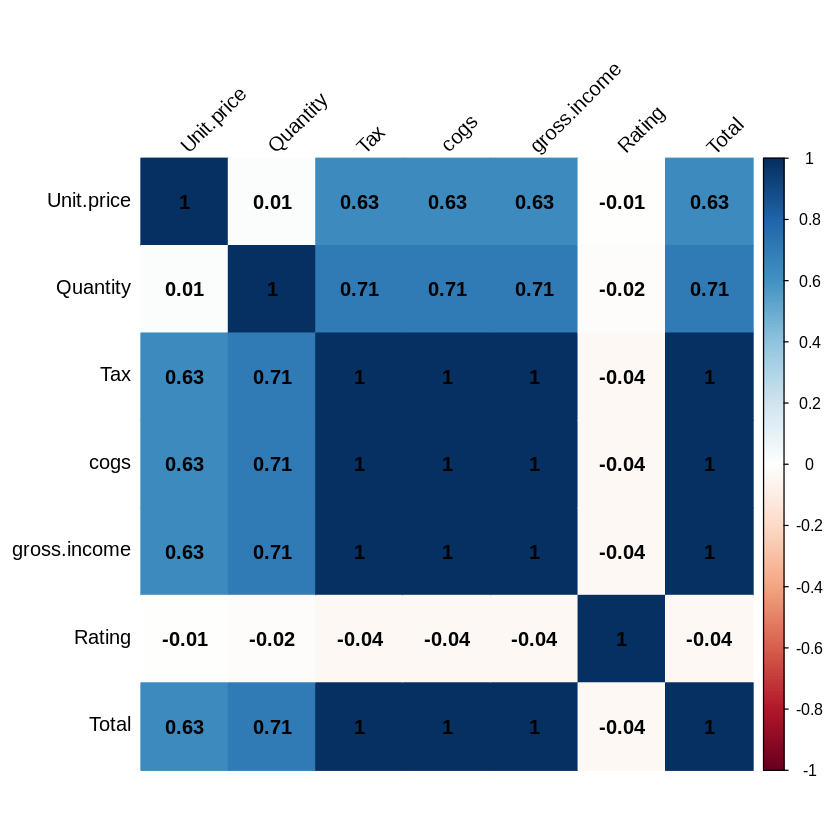

In [ ]:
#Get the correlation matrix
res = cor(nums)
#Plotting a correlation plot
corrplot(res, method="color",addCoef.col = "black",
tl.col="black", tl.srt=45)

There is perfect correlation between Tax, Cogs and gross income. There is also high correlation between Unit Price and Tax,cogs and gross.income and Total.


**Dimensionality Reduction**

**PCA**

**Feature Engineering**

All variables to be used for dimensionality reduction should be numerical variables, hence we will convert our factor categories to numerics.We will also drop the date and time columns.


In [ ]:
#First we will make a copy of our sales dataset for future use
data <- sales
#Dropping columns for date and time
data <- subset(data, select = -c(Date, Time))
head(data)

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,26.1415,9.1,548.9715
2,C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,3.8200,9.6,80.2200
3,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,16.2155,7.4,340.5255
4,A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,23.2880,8.4,489.0480
5,A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,30.2085,5.3,634.3785
6,C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,29.8865,4.1,627.6165


In [ ]:
#Converting factor columns to numeric
data$Branch <- as.numeric(data$Branch)
data$Customer.type <- as.numeric(data$Customer.type)
data$Gender <- as.numeric(data$Gender)
data$Product.line <- as.numeric(data$Product.line)
data$Payment <- as.numeric(data$Payment)
data$Quantity <- as.numeric(data$Quantity)
head(data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,74.69,7,26.1415,NA,522.83,26.1415,9.1,548.9715
2,NA,NA,NA,NA,15.28,5,3.8200,NA,76.40,3.8200,9.6,80.2200
3,NA,NA,NA,NA,46.33,7,16.2155,NA,324.31,16.2155,7.4,340.5255
4,NA,NA,NA,NA,58.22,8,23.2880,NA,465.76,23.2880,8.4,489.0480
5,NA,NA,NA,NA,86.31,7,30.2085,NA,604.17,30.2085,5.3,634.3785
6,NA,NA,NA,NA,85.39,7,29.8865,NA,597.73,29.8865,4.1,627.6165


In [ ]:
install.packages("factoextra",dependencies = TRUE,repos = 'http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘pixmap’, ‘sp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’, ‘ade4’, ‘ca’, ‘igraph’, ‘mclust’




In [ ]:
library(factoextra)

In [ ]:
data.pca <- prcomp(data[,c(1:11)], center = TRUE, scale. = TRUE)
summary(data.pca)

In [ ]:
str(data.pca)

We have obtained 11 principal components. Our first PC, PC1 explains 35.7% Variation, our second, PC2 explains 10.3%. The first 8 PCs gives us a variability proportion of upto 99%.


In [ ]:
#Graph of variables
fviz_pca_var(data.pca,
col.var = "contrib", # Color by contributions to the PC
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE # Avoid text overlapping
)

Gross income, Tax and cogs contribute highly to the first PC whereas Gender, Payment mostly contribute to the second PC

In [ ]:
# Eigenvalues
eig.val <- get_eigenvalue(data.pca)
eig.val


* Since the first 8 Principal Components contribute upto 99.23% of the variance proportion, they can be used for analysis.

## **Feature Selection**

In [ ]:
Using Filter Method Using the filter method, we will check for correlation between variables. We will then remove variables that are highly correlated as that is a sign of redundancy.


In [ ]:
install.packages("caret")
library(caret)

In [ ]:
#Separating target variable with independent variables
df <- data[-12]
# Calculating the correlation matrix
correlationMatrix <- cor(df)
# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff= 0.75)
# Highly correlated attributes
highlyCorrelated

In [ ]:
names(df[,highlyCorrelated])

Tax and Cogs are highly correlated

In [ ]:
# Removing the highly correlated features
df.feat<-df[-highlyCorrelated]
# Performing a graphical comparison
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(df.feat), order = "hclust")

**Conclusion**

* that the following features will be used for analysis: 
- Gender
- Payment
- Customer type 
- Rating 
- Branch 
- Unit price 
- Product line 
- Quantity 
- Gross Income